# Multilayer Perceptron from raw data
This notebook will guide you through the use of the `keras` package to train a multilayer perceptron for handwritten digits classification. You are going to use the `mnist` dataset from LeCun et al. 1998

## Loading the packages

In [142]:
%pip install tensorflow --upgrade
%pip install keras --upgrade

import numpy as np
from matplotlib import pyplot as pl

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adadelta
from keras.utils import np_utils
from sklearn import metrics as me
from tensorflow.keras.backend import clear_session
%matplotlib inline

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: setuptools in c:\users\nelsonwork\appdata\local\programs\python\python39\lib\site-packages (from tensorflow) (57.4.0)


You should consider upgrading via the 'C:\Users\NelsonWork\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.



Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\NelsonWork\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


## Using raw data to train a MLP
First load the `mnist` dataset and normalize it to be in the range [0, 1]

In [173]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

n_classes = 10
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)

60000 train samples
10000 test samples


In [134]:
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

Create the MLP

In [135]:
def test_hypers(neurons, drops, batch_sizes, optims, optimNames):
    for n_neurons in neurons:
        for drop in drops:
            for batch_size in batch_sizes:
                for i_o, optim in enumerate(optims):
                    n_epoch = 20
                    clear_session()
                    model = Sequential()
                    model.add(Dense(n_neurons, input_shape=(784,), activation='relu'))
                    if drop > 0:
                        model.add(Dropout(drop))
                    model.add(Dense(n_classes, activation='softmax'))
                    model.compile(loss='categorical_crossentropy', optimizer=optim, metrics=['accuracy'])
                    history = model.fit(X_train, Y_train,
                                    batch_size=batch_size, epochs=n_epoch,
                                    verbose=1, validation_data=(X_test, Y_test))
                    plot_graph(history, optimNames[i_o], batch_size, n_epoch, n_neurons, drop)
                    score = model.evaluate(X_test, Y_test, verbose=0)
                    print('Test score:', score[0])
                    print('Test accuracy:', score[1])

In [136]:
def plot_graph(history, optimName, batch_size, n_epoch, n_neurons, drop):
    pl.clf()
    pl.plot(history.history['loss'], label='Training')
    pl.plot(history.history['val_loss'], label='Testing')
    pl.ylabel('loss')
    pl.xlabel('Number of epochs')
    pl.title(optimName+' Batch size:'+str(batch_size)+' Nb epochs:'+str(n_epoch)+' Nb neurons:'+str(n_neurons)+' Dropout:'+ ('None' if drop < 0 else str(drop)))
    pl.legend()
    pl.grid()
    pl.savefig('../output/' + optimName+'_Batch_size'+str(batch_size)+' Nb_epochs'+str(n_epoch)+' Nb_neurons'+str(n_neurons)+'_Dropout_'+ ('None' if drop < 0 else str(drop)) + '.png', dpi=500)

In [153]:
from keras.models import Model
from keras import Input

learning_rate = 0.1
training_epochs = 20
batch_size = 100

n_input = 784 # number of features
n_hidden_1 = 300
n_hidden_2 = 100
n_hidden_3 = 100
n_hidden_4 = 200
num_digits = 10

Inp = Input(shape=(784,))
x = Dense(n_hidden_1, activation='relu', name = "Hidden_Layer_1")(Inp)
x = Dense(n_hidden_2, activation='relu', name = "Hidden_Layer_2")(x)
x = Dense(n_hidden_3, activation='relu', name = "Hidden_Layer_3")(x)
x = Dense(n_hidden_4, activation='relu', name = "Hidden_Layer_4")(x)
output = Dense(num_digits, activation='softmax', name = "Output_Layer")(x)

# We rely on ADAM as our optimizing methodology
adam = keras.optimizers.Adam(lr=learning_rate)
model2 = Model(Inp, output)

model2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history2 = model2.fit(X_train, Y_train,
                      batch_size = batch_size,
                      epochs = training_epochs,
                      verbose = 2,
                      validation_data=(X_test, Y_test))

In [174]:
model = Sequential()
model.add(Dense(300, input_shape=(784,), activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_37 (Dense)            (None, 300)               235500    
                                                                 
 dense_38 (Dense)            (None, 100)               30100     
                                                                 
 dense_39 (Dense)            (None, 100)               10100     
                                                                 
 dense_40 (Dense)            (None, 200)               20200     
                                                                 
 dense_41 (Dense)            (None, 10)                2010      
                                                                 
Total params: 297,910
Trainable params: 297,910
Non-trainable params: 0
_________________________________________________________________


Define some constants and train the MLP

In [175]:
from tensorflow import keras

batch_size = 200
n_epoch = 20

adam = keras.optimizers.Adam(lr=0.005)

model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
history = model.fit(X_train, Y_train,
                    batch_size=batch_size, epochs=n_epoch,
                    verbose=1, validation_data=(X_test, Y_test))

Epoch 1/20
300/300 [==============================] - 7s 19ms/step - loss: 0.2470 - accuracy: 0.9234 - val_loss: 0.1231 - val_accuracy: 0.9640
Epoch 2/20
300/300 [==============================] - 7s 23ms/step - loss: 0.1125 - accuracy: 0.9666 - val_loss: 0.0986 - val_accuracy: 0.9700
Epoch 3/20
300/300 [==============================] - 6s 21ms/step - loss: 0.0821 - accuracy: 0.9758 - val_loss: 0.1046 - val_accuracy: 0.9705
Epoch 4/20
300/300 [==============================] - 6s 22ms/step - loss: 0.0656 - accuracy: 0.9804 - val_loss: 0.1113 - val_accuracy: 0.9702
Epoch 5/20
300/300 [==============================] - 6s 20ms/step - loss: 0.0559 - accuracy: 0.9834 - val_loss: 0.0824 - val_accuracy: 0.9786
Epoch 6/20
300/300 [==============================] - 7s 23ms/step - loss: 0.0494 - accuracy: 0.9851 - val_loss: 0.0954 - val_accuracy: 0.9755
Epoch 7/20
300/300 [==============================] - 6s 21ms/step - loss: 0.0429 - accuracy: 0.9868 - val_loss: 0.0870 - val_accuracy: 0.9786

Show the performance of the model

313/313 [==============================] - 2s 6ms/step - loss: 0.1153 - accuracy: 0.9787
Test score: 0.11527500301599503
Test accuracy: 0.9786999821662903


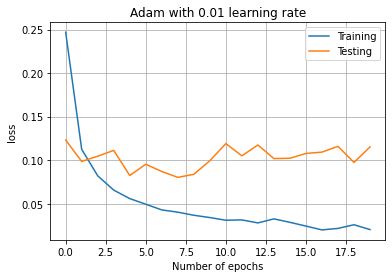

In [176]:
pl.plot(history.history['loss'], label='Training')
pl.plot(history.history['val_loss'], label='Testing')
pl.ylabel('loss')
pl.xlabel('Number of epochs')
pl.title('Adam with 0.01 learning rate')
pl.legend()
pl.grid()

score = model.evaluate(X_test, Y_test, verbose=1)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Confusion matrix

In [158]:
pred = model2.predict(X_test)
pred = np.argmax(pred, axis=-1)
me.confusion_matrix(y_test, pred)

array([[ 969,    1,    0,    1,    1,    1,    1,    1,    2,    3],
       [   0, 1129,    2,    1,    0,    1,    1,    1,    0,    0],
       [   2,    1, 1018,    0,    1,    0,    0,    8,    1,    1],
       [   0,    0,    7,  988,    0,    3,    0,    6,    1,    5],
       [   0,    2,    2,    0,  974,    0,    2,    0,    1,    1],
       [   2,    0,    1,   15,    3,  857,    7,    1,    3,    3],
       [   2,    4,    0,    1,    7,    2,  941,    0,    1,    0],
       [   1,    5,   11,    2,    0,    0,    0,  999,    2,    8],
       [   2,    3,    5,    3,    5,    1,    4,    4,  942,    5],
       [   1,    2,    0,    2,   86,    1,    0,    5,    5,  907]],
      dtype=int64)

Epoch 1/20
938/938 [==============================] - 2s 2ms/step - loss: 0.8421 - accuracy: 0.7365 - val_loss: 0.5068 - val_accuracy: 0.8506
Epoch 2/20
938/938 [==============================] - 2s 2ms/step - loss: 0.4707 - accuracy: 0.8607 - val_loss: 0.4348 - val_accuracy: 0.8723
Epoch 3/20
938/938 [==============================] - 2s 2ms/step - loss: 0.4220 - accuracy: 0.8769 - val_loss: 0.4000 - val_accuracy: 0.8843
Epoch 4/20
938/938 [==============================] - 2s 2ms/step - loss: 0.3974 - accuracy: 0.8848 - val_loss: 0.3880 - val_accuracy: 0.8881
Epoch 5/20
938/938 [==============================] - 2s 2ms/step - loss: 0.3833 - accuracy: 0.8883 - val_loss: 0.3840 - val_accuracy: 0.8880
Epoch 6/20
938/938 [==============================] - 2s 2ms/step - loss: 0.3744 - accuracy: 0.8921 - val_loss: 0.3755 - val_accuracy: 0.8930
Epoch 7/20
938/938 [==============================] - 2s 2ms/step - loss: 0.3679 - accuracy: 0.8924 - val_loss: 0.3720 - val_accuracy: 0.8918
Epoch 

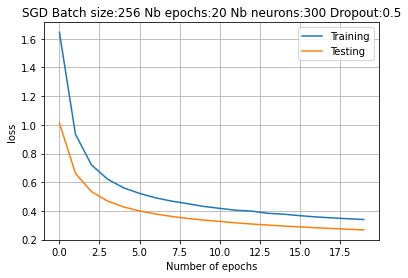

In [83]:
test_hypers([5, 50, 100, 300], [-1, 0.3, 0.5], [64, 128, 256], [RMSprop(), Adam(), SGD()], ['RMSprop', 'Adam', 'SGD'])